# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [29]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

Text(0, 0.5, 'Winning times(in seconds)')

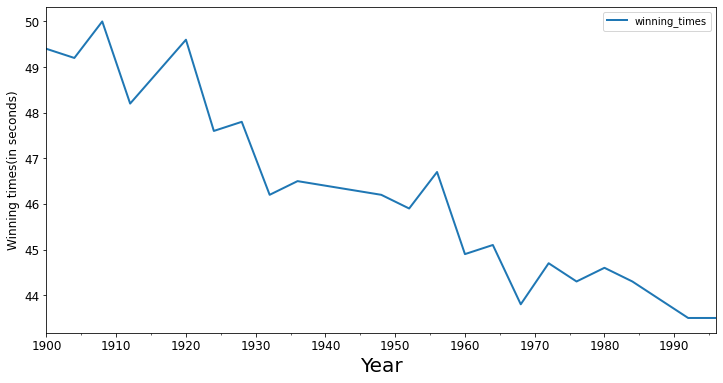

In [30]:
# Plot the time series
data.plot(figsize=(12,6), linewidth =2, fontsize=12)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Winning times(in seconds)', fontsize=12)

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [31]:
# Difference the time series
data['Diff_Winning_Time']= data['winning_times'].diff()
data=data.dropna()

In [32]:
data.head()

,winning_times,Diff_Winning_Time
year,,
1904,49.2,-0.2
1908,50.0,0.8
1912,48.2,-1.8
1920,49.6,1.4
1924,47.6,-2.0


<Figure size 576x216 with 0 Axes>

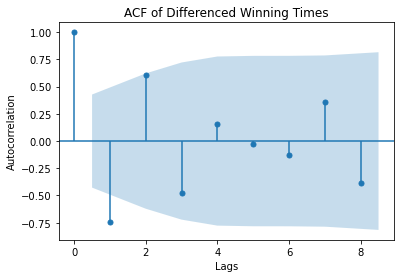

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(8,3))
plot_acf(data['Diff_Winning_Time'], lags=8,alpha=0.05)
plt.title('ACF of Differenced Winning Times')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(False)

plt.show()

<Figure size 576x216 with 0 Axes>

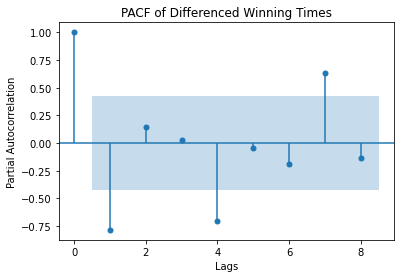

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(8,3))
plot_pacf(data['Diff_Winning_Time'], lags=8,alpha=0.05)
plt.title('PACF of Differenced Winning Times')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(False)

plt.show()

Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [35]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,0) model
mod_arma = ARIMA(data['Diff_Winning_Time'], order=(1, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:      Diff_Winning_Time   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Mon, 17 Jun 2024   AIC                             46.107
Time:                        14:30:07   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

In [36]:
# Fit an ARMA(2,1) model
mod_arma = ARIMA(data['Diff_Winning_Time'], order=(2, 0, 1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:      Diff_Winning_Time   No. Observations:                   21
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.931
Date:                Mon, 17 Jun 2024   AIC                             49.862
Time:                        14:30:07   BIC                             55.084
Sample:                    12-31-1904   HQIC                            50.995
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.092     -3.079      0.002      -0.464      -0.103
ar.L1         -0.6103      2.583     -0.236      0.813      -5.673       4.453
ar.L2          0.1279      1.848      0.069      0.9

In [37]:
# Fit an ARMA(2,2) model
mod_arma = ARIMA(data['Diff_Winning_Time'], order=(2, 0, 2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:      Diff_Winning_Time   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -16.472
Date:                Mon, 17 Jun 2024   AIC                             44.943
Time:                        14:30:07   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2719      0.103     -2.632      0.008      -0.474      -0.069
ar.L1         -1.7575      0.117    -15.035      0.000      -1.987      -1.528
ar.L2         -0.9183      0.119     -7.692      0.0

## What is your final model? Why did you pick this model?

# Your comments here

"""
ARMA(1,0), ARMA(2,2) and ARMA(2,1) all seem to have decent fits with significant parameters. 
Depending on whether you pick AIC or BIC as a model selection criterion, 
your result may vary. In this situation, you'd generally go for a model with fewer parameters, 
so ARMA(1,0) seems fine. Note that we have a relatively short time series, 
which can lead to a more difficult model selection process.
"""


## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 